In [11]:
import xarray as xr
DATASET_PATH = "data/IberFire.nc"

In [12]:
ds = xr.open_dataset(DATASET_PATH)
ds

<xarray.Dataset> Size: 731GB
Dimensions:                                        (y: 920, x: 1188, time: 6241)
Coordinates:
  * x                                              (x) float64 10kB 2.675e+06...
  * y                                              (y) float64 7kB 2.492e+06 ...
  * time                                           (time) datetime64[ns] 50kB ...
Data variables: (12/261)
    x_index                                        (y, x) uint16 2MB ...
    y_index                                        (y, x) uint16 2MB ...
    is_spain                                       (y, x) uint16 2MB ...
    is_fire                                        (time, y, x) uint8 7GB ...
    is_near_fire                                   (time, y, x) uint8 7GB ...
    x_coordinate                                   (y, x) float32 4MB ...
    ...                                             ...
    LST                                            (time, y, x) float32 27GB ...
    SWI_001                                        (time, y, x) float32 27GB ...
    SWI_005                                        (time, y, x) float32 27GB ...
    SWI_010                                        (time, y, x) float32 27GB ...
    SWI_020                                        (time, y, x) float32 27GB ...
    FWI                                            (time, y, x) float32 27GB ...
Attributes: (12/17)
    title:                IberFire
    description:          Datacube centered in Spain with 1km x 1km spatial r...
    dimensions:           (y: 920, x: 1188, time: 6241)
    spatial_resolution:   1km x 1km
    temporal_resolution:  Daily
    start_date:           2007-12-01
    ...                   ...
    geospatial_x_max:     3861734.3466
    geospatial_y_min:     1573195.9911000002
    geospatial_y_max:     2492195.9911
    author:               Julen Ercibengoa Calvo
    author_contact:       julen.ercibengoa@gmail.com, julen.ercibengoa@teknik...
    creation_date:        2025-04-04

In [13]:
# select variables 
fwi = ds['FWI']
fwi

<xarray.DataArray 'FWI' (time: 6241, y: 920, x: 1188)> Size: 27GB
[6821163360 values with dtype=float32]
Coordinates:
  * x        (x) float64 10kB 2.675e+06 2.676e+06 ... 3.861e+06 3.862e+06
  * y        (y) float64 7kB 2.492e+06 2.491e+06 ... 1.574e+06 1.573e+06
  * time     (time) datetime64[ns] 50kB 2007-12-01 2007-12-02 ... 2024-12-31
Attributes:
    long_name:    Fire Weather Index
    description:  The Canadian Forest Fire Weather Index at 0.25 degree spati...
    source:       https://ewds.climate.copernicus.eu/datasets/cems-fire-histo...
    units:        dimensionless

In [14]:
subset = ds[['t2m_mean', 'RH_mean', "is_spain"]]
subset

<xarray.Dataset> Size: 55GB
Dimensions:   (time: 6241, y: 920, x: 1188)
Coordinates:
  * x         (x) float64 10kB 2.675e+06 2.676e+06 ... 3.861e+06 3.862e+06
  * y         (y) float64 7kB 2.492e+06 2.491e+06 ... 1.574e+06 1.573e+06
  * time      (time) datetime64[ns] 50kB 2007-12-01 2007-12-02 ... 2024-12-31
Data variables:
    t2m_mean  (time, y, x) float32 27GB ...
    RH_mean   (time, y, x) float32 27GB ...
    is_spain  (y, x) uint16 2MB ...
Attributes: (12/17)
    title:                IberFire
    description:          Datacube centered in Spain with 1km x 1km spatial r...
    dimensions:           (y: 920, x: 1188, time: 6241)
    spatial_resolution:   1km x 1km
    temporal_resolution:  Daily
    start_date:           2007-12-01
    ...                   ...
    geospatial_x_max:     3861734.3466
    geospatial_y_min:     1573195.9911000002
    geospatial_y_max:     2492195.9911
    author:               Julen Ercibengoa Calvo
    author_contact:       julen.ercibengoa@gmail.com, julen.ercibengoa@teknik...
    creation_date:        2025-04-04

In [15]:
# With coordinates:
x_coord, y_coord = 3e+06, 2e06
cell = ds.sel(x=x_coord, y=y_coord, method='nearest')

print(f"Index of the x coordinate: {cell["x_index"].values}")
print(f"Index of the y coordinate: {cell["y_index"].values}")

cell["FWI"].values

Index of the x coordinate: 325
Index of the y coordinate: 492


array([4.625    , 3.2460938, 4.2773438, ..., 3.9570312, 3.9101562,
       4.3632812], shape=(6241,), dtype=float32)

In [16]:
# With indexes:
x_idx, y_idx = 325, 492
cell = ds.isel(x=x_idx, y=y_idx)
cell["FWI"].values

array([4.625    , 3.2460938, 4.2773438, ..., 3.9570312, 3.9101562,
       4.3632812], shape=(6241,), dtype=float32)

In [17]:
# A single day
day = ds.sel(time='2023-08-15')

# Several arbitrary dates
days = ds.sel(time=['2022-07-01', '2022-07-15', '2022-08-01'])

In [18]:
day

<xarray.Dataset> Size: 1GB
Dimensions:                                        (y: 920, x: 1188)
Coordinates:
  * x                                              (x) float64 10kB 2.675e+06...
  * y                                              (y) float64 7kB 2.492e+06 ...
    time                                           datetime64[ns] 8B 2023-08-15
Data variables: (12/261)
    x_index                                        (y, x) uint16 2MB ...
    y_index                                        (y, x) uint16 2MB ...
    is_spain                                       (y, x) uint16 2MB ...
    is_fire                                        (y, x) uint8 1MB ...
    is_near_fire                                   (y, x) uint8 1MB ...
    x_coordinate                                   (y, x) float32 4MB ...
    ...                                             ...
    LST                                            (y, x) float32 4MB ...
    SWI_001                                        (y, x) float32 4MB ...
    SWI_005                                        (y, x) float32 4MB ...
    SWI_010                                        (y, x) float32 4MB ...
    SWI_020                                        (y, x) float32 4MB ...
    FWI                                            (y, x) float32 4MB ...
Attributes: (12/17)
    title:                IberFire
    description:          Datacube centered in Spain with 1km x 1km spatial r...
    dimensions:           (y: 920, x: 1188, time: 6241)
    spatial_resolution:   1km x 1km
    temporal_resolution:  Daily
    start_date:           2007-12-01
    ...                   ...
    geospatial_x_max:     3861734.3466
    geospatial_y_min:     1573195.9911000002
    geospatial_y_max:     2492195.9911
    author:               Julen Ercibengoa Calvo
    author_contact:       julen.ercibengoa@gmail.com, julen.ercibengoa@teknik...
    creation_date:        2025-04-04

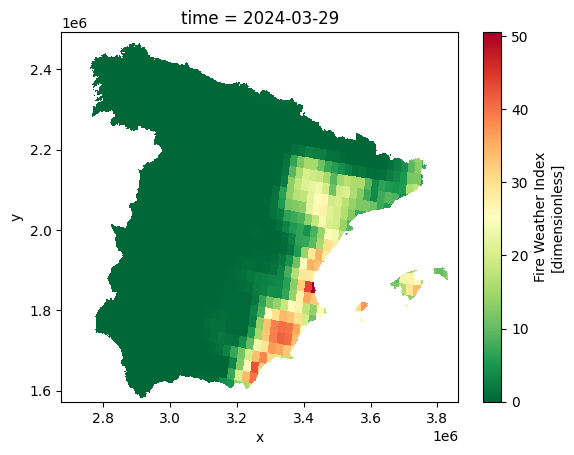

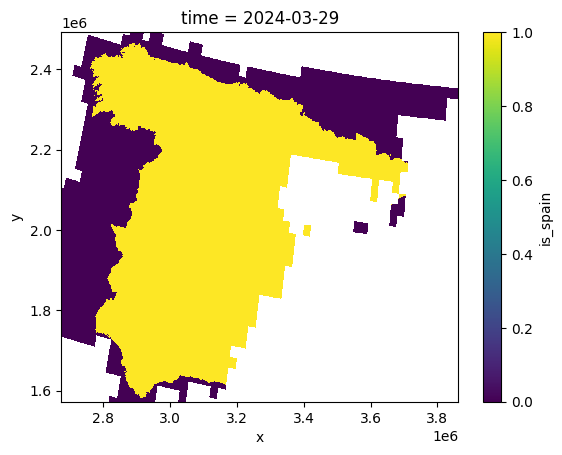

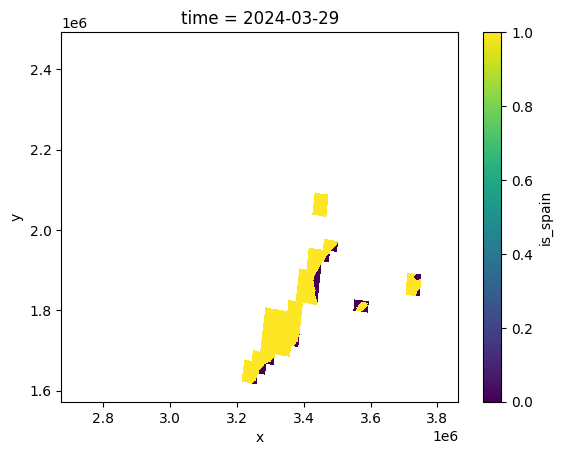

In [19]:
import matplotlib.pyplot as plt
fwi = ds["FWI"].sel(time="2024-03-29")

low_risk_is_spain = ds.sel(time="2024-03-29")["is_spain"].where(fwi < 5)
high_risk_is_spain = ds.sel(time="2024-03-29")["is_spain"].where(fwi > 25)

fwi.where(ds["is_spain"]==1).plot(cmap="RdYlGn_r")
plt.show()

low_risk_is_spain.plot()
plt.show()

high_risk_is_spain.plot()
plt.show()

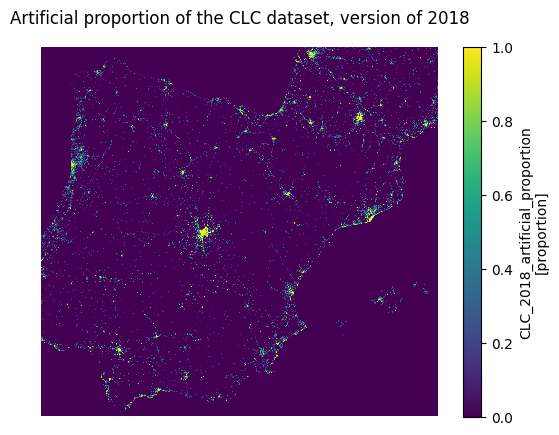

In [20]:
ds["CLC_2018_artificial_proportion"].plot()
plt.title("Artificial proportion of the CLC dataset, version of 2018")
plt.axis("off")
plt.show()

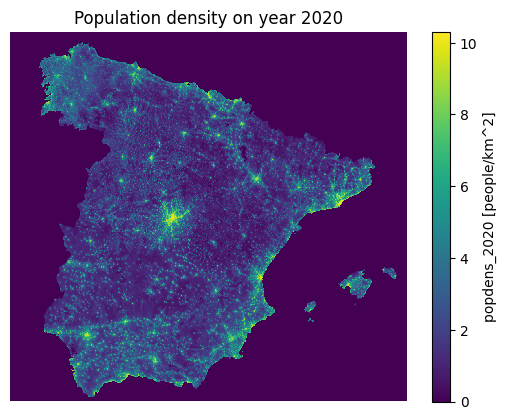

In [21]:
import numpy as np

np.log1p(ds["popdens_2020"]).plot()
plt.title("Population density on year 2020")
plt.axis("off")
plt.show()